In [ ]:
##In this project, I will:

##Load the data as a pandas dataframe
##Clean the data, taking care of the blank entries
##Run exploratory data analysis (EDA) and identify the attributes that most affect the charges
##Develop single variable and multi variable Linear Regression models for predicting the charges
##Use Ridge regression to refine the performance of Linear regression models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

In [5]:
df=pd.read_csv(filepath, header=None)
df.head()

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [6]:
headers=["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns=headers

In [7]:
df.columns

Index(['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region',
       'charges'],
      dtype='object')

In [8]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [9]:
df.replace(to_replace='?', value=np.nan, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [11]:
df.isnull().sum()

age               4
gender            0
bmi               0
no_of_children    0
smoker            7
region            0
charges           0
dtype: int64

In [15]:
age_mean=df['age'].astype(float).mean()
df['age'].replace(np.nan, value=age_mean, inplace=True)

In [17]:
df['age'].isnull().sum()

0

In [20]:
is_smoker=df['smoker'].value_counts().idxmax()

In [21]:
df['smoker'].replace(np.nan, is_smoker, inplace=True)

In [22]:
df['smoker'].isnull().sum()

0

In [23]:
df.dtypes

age                object
gender              int64
bmi               float64
no_of_children      int64
smoker             object
region              int64
charges           float64
dtype: object

In [27]:
df[['age','smoker']]=df[['age','smoker']].astype(int)

In [28]:
df[['age','smoker']].dtypes

age       int32
smoker    int32
dtype: object

In [29]:
df['charges']= df['charges'].round(2)

In [31]:
df.head(3)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.90,0,1,3,16884.92
1,18,2,33.77,1,0,4,1725.55
2,28,2,33.00,3,0,4,4449.46


(0.0, 66902.85800000001)

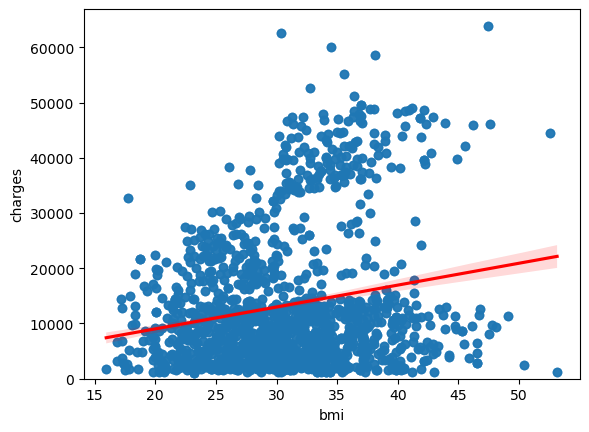

In [34]:
##Implement the regression plot for charges with respect to bmi
sns.regplot(df, x='bmi',y='charges',  line_kws={"color": "red"})
plt.ylim(0,)

<Axes: xlabel='smoker', ylabel='charges'>

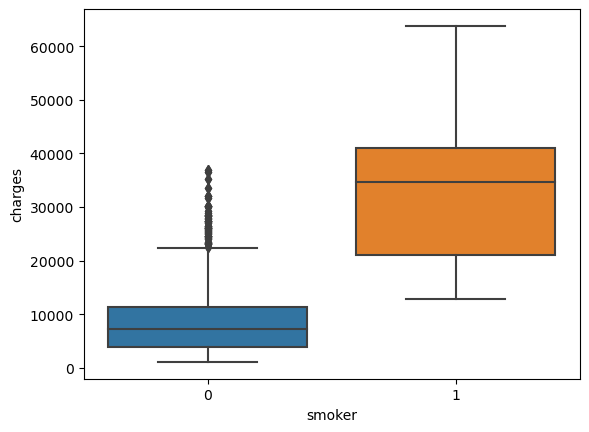

In [36]:
##Implement the box plot for charges with respect to smoker.
sns.boxplot(df, x='smoker', y='charges')

In [37]:
##Print the correlation matrix for the dataset.
corr_matrix= df.corr()
print(corr_matrix)

                     age    gender       bmi  no_of_children    smoker  \
age             1.000000 -0.026046  0.113048        0.037574 -0.023286   
gender         -0.026046  1.000000  0.042924        0.016020  0.082326   
bmi             0.113048  0.042924  1.000000       -0.001492  0.011489   
no_of_children  0.037574  0.016020 -0.001492        1.000000  0.006362   
smoker         -0.023286  0.082326  0.011489        0.006362  1.000000   
region         -0.007167  0.022213  0.271119       -0.025717  0.054077   
charges         0.298624  0.062837  0.199846        0.066442  0.788783   

                  region   charges  
age            -0.007167  0.298624  
gender          0.022213  0.062837  
bmi             0.271119  0.199846  
no_of_children -0.025717  0.066442  
smoker          0.054077  0.788783  
region          1.000000  0.054058  
charges         0.054058  1.000000  


<Axes: >

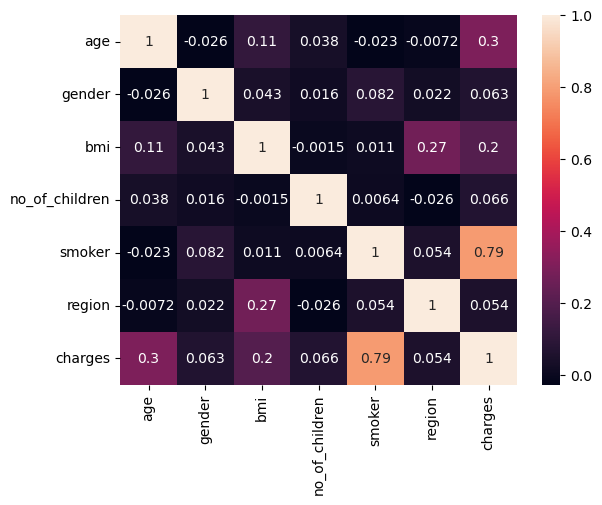

In [39]:
## let's plot a heatmap
sns.heatmap(corr_matrix, annot=True)

In [45]:
##Fit a linear regression model that may be used to predict the charges value,
###just by using the smoker attribute of the dataset.
##Print the score of this model.
X=df[['smoker']]
Y=df['charges']
## i will verify the shape
print(X.shape)
print(Y.shape)

(2772, 1)
(2772,)


In [46]:
lr=LinearRegression()
lr.fit(X,Y)
print(lr.score(X,Y))

0.6221791733924185


In [47]:
##Fit a linear regression model that may be used to predict the charges value,
##just by using all other attributes of the dataset. Print the 
## score of this model. You should see an improvement in the performance.

Z=df.drop(columns='charges')

In [48]:
lr.fit(Z,Y)
print(lr.score(Z,Y))

0.7504083820289634


In [49]:
##Create a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression()
##to create a model that can predict the charges value using all the other attributes of the dataset. 
##There should be even further improvement in the performance.

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))


0.8451442399122973


In [50]:
##  Model Refinement
## Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.
X_train, X_test, Y_train,Y_test= train_test_split(X,Y, test_size=0.2, random_state=1)

In [51]:
##Initialize a Ridge regressor that used hyperparameter 
 ##Fit the model using training data data subset. Print the 
 ##score for the testing data.
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(X_train, Y_train)
yhat = RidgeModel.predict(X_test)
print(r2_score(Y_test,yhat))


0.5546864493649875


In [55]:
##Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the 
 ## score for the testing subset
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(X_train)
x_test_pr=pr.fit_transform(X_test)
RidgeModel=Ridge(alpha=1)
RidgeModel.fit(x_train_pr, Y_train)
yhat = RidgeModel.predict(x_test_pr)
print(r2_score(Y_test, yhat))

0.554815025239841
